/tmp/ipykernel_133/2422650305.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefficients = np.array(np.linalg.lstsq(xMatrix,y))[0]
/tmp/ipykernel_133/2422650305.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  coefficients = np.array(np.linalg.lstsq(xMatrix,y))[0]


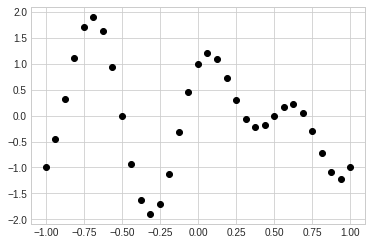

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import math
import random
import scipy
import scipy.linalg
myList = []
num = -1
while num<=1:
    myList.append(num)
    num += 0.0625
myVector = np.array(myList)
def f(x):
    return math.sin(2*math.pi*x)+math.cos(3*math.pi*x)
xMatrix=[]
for i in range(0,33):
    xMatrix.append([])
    for j in range(0,7):
        xMatrix[i].append(myVector[i] ** j)
y=[]
for i in range(0,33):
    y.append(f(myVector[i]))
coefficients = np.array(np.linalg.lstsq(xMatrix,y))[0]
def leastSquaresPolynomial(x):
    mySum=0
    for i in range(0,7):
        mySum+=coefficients[i] * (x ** i)
    return mySum
leastSquaresPoints=[]
for i in range(0,33):
    leastSquaresPoints.append(leastSquaresPolynomial(myVector[i]))
plt.plot(myVector, y, 'o', color='black');

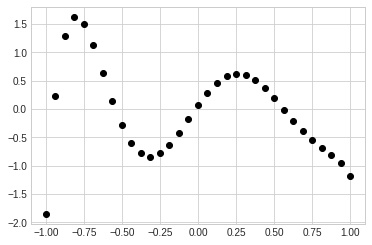

In [28]:
plt.plot(myVector, leastSquaresPoints, 'o', color='black');

/tmp/ipykernel_133/1623453061.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  trueSol=np.array(np.linalg.lstsq(a,y1))[0]
/tmp/ipykernel_133/1623453061.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trueSol=np.array(np.linalg.lstsq(a,y1))[0]


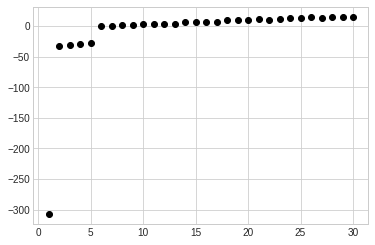

In [42]:
import sys
testPoints=[]
for i in range(0,100):
    testPoints.append(random.uniform(-1,1))
m31=[]
for i in range(0,100):
    m31.append([])
    for j in range(0,31):
        m31[i].append(testPoints[i] ** j)
y1=[]
for i in range(0,100):
    y1.append(f(testPoints[i]))
sumYSquared=0
for i in range(0,100):
    sumYSquared+=y1[i] ** 2
errorsNormal=[]
errorsQR=[]
def findPolynomial(x,coefficients):
    mySum=0
    for i in range(0,len(coefficients)):
        mySum+=coefficients[i] * (x ** i)
    return mySum
for k in range(1,31):
    myList=[]
    sumNormalErrorSquared=0
    sumQRErrorSquared=0
    for i in range(0,100):
        myList.append([])
        for j in range(0,k):
            myList[i].append(m31[i][j])
    a=np.array(myList)
    trueSol=np.array(np.linalg.lstsq(a,y1))[0]
    #Cholesky raised an error for me so I used LU
    lower=scipy.linalg.lu(np.matmul(a.T,a))[1]
    upper=scipy.linalg.lu(np.matmul(a.T,a))[2]
    n=len(np.matmul(a.T,a))
    thisB=np.matmul(a.T,y1)
    y2=np.linalg.solve(lower,thisB)
    normalSol=np.linalg.solve(upper,y2)
    q,r=np.linalg.qr(a)
    projection=np.dot(q.T,y1)
    qrSol=np.linalg.solve(r,projection)
    for i in range(0,100):
        normalError=(findPolynomial(testPoints[i],normalSol)-findPolynomial(testPoints[i],trueSol))
        qrError=(findPolynomial(testPoints[i],qrSol)-findPolynomial(testPoints[i],trueSol))
        sumNormalErrorSquared+=normalError ** 2
        sumQRErrorSquared+=qrError ** 2
    sumNormalErrorSquared/=sumYSquared
    sumQRErrorSquared/=sumYSquared
    sumNormalErrorSquared=(sumNormalErrorSquared)**1/2
    sumQRErrorSquared=(sumQRErrorSquared)**1/2
    errorsNormal.append(sumNormalErrorSquared)
    errorsQR.append(sumQRErrorSquared)
ds=[]
for i in range(1,31):
    ds.append(i)
logErrorsNormal=[]
logErrorsQR=[]
#errorsNormal[0] was 0 so I had to convert it to the minimum value so I could take its log
errorsNormal[0]=sys.float_info.min
for i in range(0,30):
    logErrorsNormal.append(math.log(errorsNormal[i],10))
    logErrorsQR.append(math.log(errorsQR[i],10))
plt.plot(ds, logErrorsNormal, 'o', color='black');

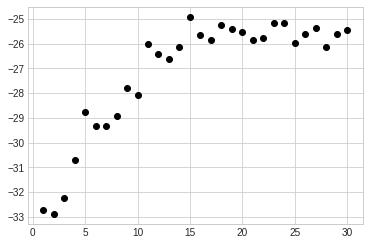

In [43]:
plt.plot(ds, logErrorsQR, 'o', color='black');